<a href="https://colab.research.google.com/github/Ayat30/datamining/blob/main/churn_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd #powerful data analysis and manipulation
import numpy as np
import missingno as msno #visualization of missing value
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder #Encode target labels with value between 0 and n_classes-1.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier #Classifier implementing the k-nearest neighbors vote
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets
from sklearn.metrics import accuracy_score

In [ ]:
#loading data
from google.colab import files   
uploaded = files.upload()

In [41]:
df = pd.read_csv('/content/Telco-Customer-Churn(1).csv')

In [42]:
df.head(10)

,CustomerID,Gender,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Female,1,No,No phone service,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,2,Male,34,Yes,No,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.5,No
2,3,Male,2,Yes,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,4,Male,45,No,No phone service,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,5,Female,2,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,6,Female,8,Yes,Yes,Fiber optic,No,No,Yes,No,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,7,Male,22,Yes,Yes,Fiber optic,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,8,Female,10,No,No phone service,DSL,Yes,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,9,Female,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,10,Male,62,Yes,No,DSL,Yes,Yes,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.info()

In [43]:
df = df.drop(['CustomerID'], axis = 1)
df.head()

,Gender,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,1,No,No phone service,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,34,Yes,No,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,2,Yes,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,45,No,No phone service,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,2,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#df.fillna(df["TotalCharges"].mean())

In [46]:
numerical_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,Tenure,MonthlyCharges
count,501.000000,501.000000
mean,31.459082,66.074251
std,24.391327,29.610242
min,0.000000,18.950000
25%,8.000000,44.300000
50%,28.000000,71.900000
75%,52.000000,90.050000
max,72.000000,116.250000


In [11]:
df["InternetService"].describe(include=['object', 'bool'])

count             501
unique              3
top       Fiber optic
freq              228
Name: InternetService, dtype: object

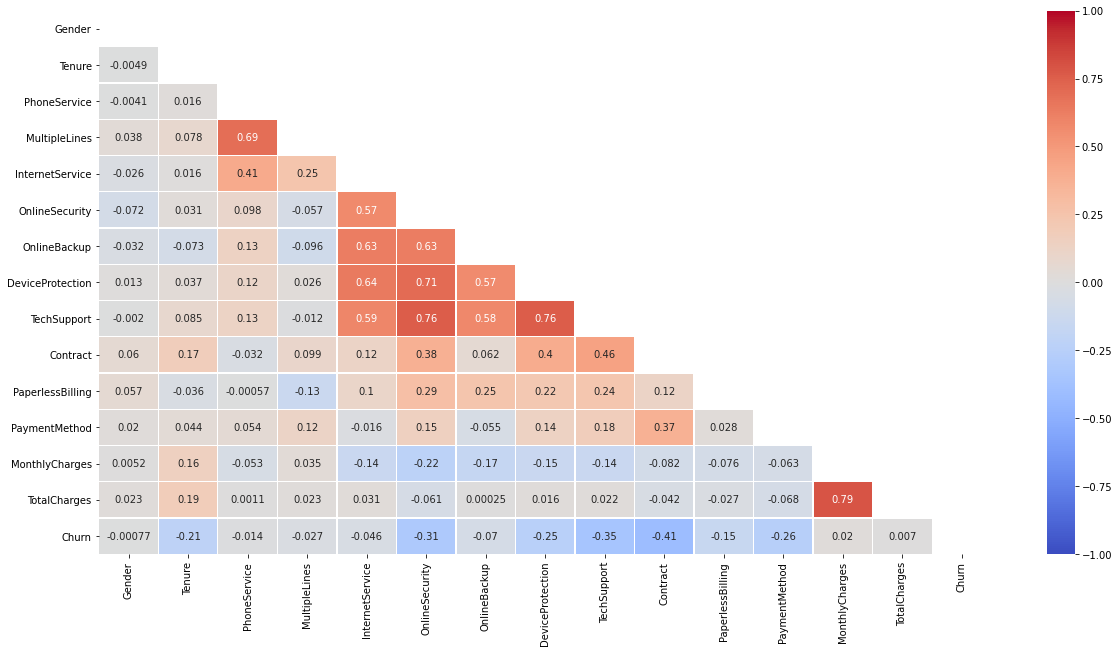

In [29]:
plt.figure(figsize=(20, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [51]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
df = df.apply(lambda x: object_to_int(x))
df.head(8)

,Gender,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,2,0,0,0,1,2,29.85,207,0
1,1,34,1,0,0,2,0,2,0,1,0,3,56.95,122,0
2,1,2,1,0,0,2,2,0,0,0,1,3,53.85,14,1
3,1,45,0,1,0,2,0,2,2,1,0,0,42.30,115,0
4,0,2,1,0,1,0,0,0,0,0,1,2,70.70,83,1
5,0,8,1,2,1,0,0,2,0,0,1,2,99.65,461,1
6,1,22,1,2,1,0,2,0,0,0,1,1,89.10,134,0
7,0,10,0,1,0,2,0,0,0,0,0,3,29.75,215,0


In [52]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values.astype(np.float)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.60, random_state = 40, stratify=y)
X_train = X_train.fillna(X_train.mean())

In [53]:
def distplot(feature, frame, color='b'):
    plt.figure(figsize=(5,2))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



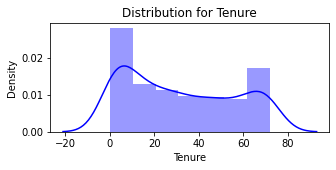

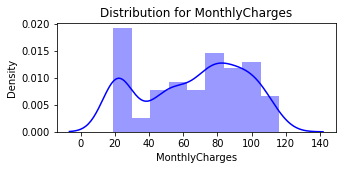

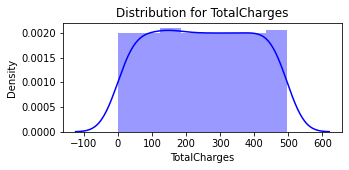

In [54]:
num_cols = ["Tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

In [55]:
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] 
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe))
scaler= StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
knn_model = KNeighborsClassifier(n_neighbors = 10) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7508305647840532


In [57]:
svc_model = SVC(random_state = 5)
svc_model.fit(X_train,y_train)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7873754152823921


In [22]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7508305647840532
